In [1]:
import pandas as pd
%matplotlib inline
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt
# Set plot font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 16

In [2]:
import pixiedust
import sys
sys.executable
pixiedust.optOut()

ImportError: No module named 'pixiedust'

In [3]:
date_prefix = '180508'
outdir_prefix = 'graphs/'
priorBetweenColor = '#1f78b4'

In [4]:
dfNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllNonZeroEffectSizeDataWithNewPrior.csv')



In [5]:
def getRelevantPartOfDataFrame(df, reward_type, num_steps, prior_type, sampling_type, effect_size = None):
    mask = (df.reward_type == reward_type) & \
                     (df.num_steps == num_steps) & \
                     (df.prior_type == prior_type) & \
                     (df.sampling_type == sampling_type)
    if effect_size != None:
        mask = mask & (df.effect_size == effect_size) 

    return df[mask]


In [6]:
def makeHistogramPlot(ax, df, reward_type, num_steps, prior_type, sampling_type, effect_size = None):
    histDf = getRelevantPartOfDataFrame(df, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
    print(histDf.shape)
    total_samples = histDf.iloc[1,:].loc['sample_size_1'] + histDf.iloc[1,:].loc['sample_size_2'] 
    n, bins, patches = ax.hist(histDf.sample_size_1, bins=range(0,total_samples+1), normed=1,color=priorBetweenColor)
    ax.set_xlim([0,total_samples])
    ax.set_xlabel("Participants in condition 1\n(Total participants: " + str(total_samples) +")")


(500, 23)
(500, 23)
(48000, 23)
(500, 23)
(500, 23)
(500, 23)


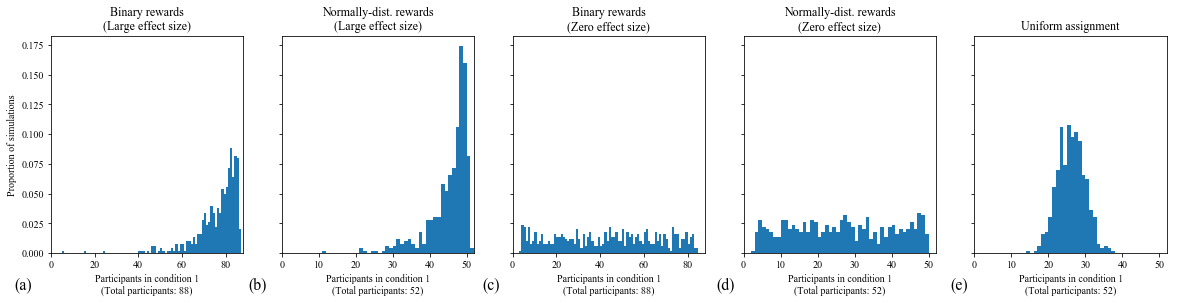

In [7]:
figure, axes = plt.subplots(1, 5, sharey='row', figsize = (20,4))
dfNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllNonZeroEffectSizeDataWithNewPrior.csv')

effect_size = 0.3
reward_type = "binary"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[0], dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
axes[0].set_ylabel("Proportion of simulations")
axes[0].set_title("Binary rewards\n(Large effect size)")
effect_size = 0.8
reward_type = "normal"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[1], dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
axes[1].set_title("Normally-dist. rewards\n(Large effect size)")



dfZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllZeroEffectSizeDataWithNewPrior.csv')
print(dfZeroES.shape)
reward_type = "binary"
num_steps = 88
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[2], dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)
axes[2].set_title("Binary rewards\n(Zero effect size)")


reward_type = "normal"
num_steps = 52
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[3], dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)

axes[3].set_title("Normally-dist. rewards\n(Zero effect size)")

reward_type = "normal"
num_steps = 52
prior_type = "priorBetween"
sampling_type = "uniform"
makeHistogramPlot(axes[4], dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)

axes[4].set_title("Uniform assignment")
starting_label_x = 0.1
label_y = 0
label_x_increment = 0.1625
for i in range(5):
    plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
                   '(' + chr(ord('a')+i) + ')', fontsize=16)
figure.savefig(outdir_prefix+date_prefix+'HistogramSampleSizes.pdf', bbox_inches='tight')

(500, 23)
(500, 23)
(48000, 23)
(500, 23)
(500, 23)
(500, 23)


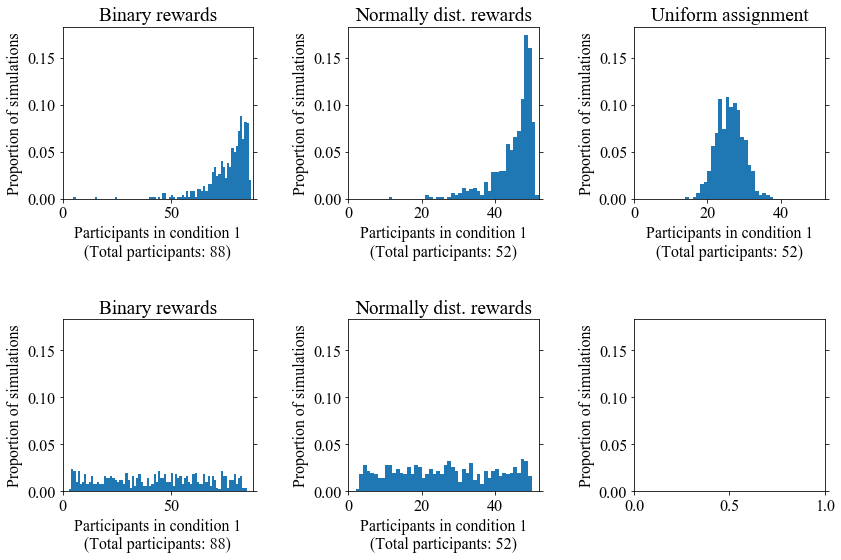

In [19]:
figure, axes = plt.subplots(2, 3, sharey='all', figsize = (12,8))
# figure, axes = plt.subplots(1, 5, sharey='row', figsize = (20,4))

dfNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllNonZeroEffectSizeDataWithNewPrior.csv')

effect_size = 0.3
reward_type = "binary"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[0,0], dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
axes[0,0].set_title("Binary rewards")

effect_size = 0.8
reward_type = "normal"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[0,1], dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
axes[0,1].set_title("Normally dist. rewards")



dfZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllZeroEffectSizeDataWithNewPrior.csv')
print(dfZeroES.shape)
reward_type = "binary"
num_steps = 88
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[1,0], dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)
axes[1,0].set_title("Binary rewards")
axes[1,0].set_ylabel("Proportion of simulations")


reward_type = "normal"
num_steps = 52
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[1,1], dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)

axes[1,1].set_title("Normally dist. rewards")

reward_type = "normal"
num_steps = 52
prior_type = "priorBetween"
sampling_type = "uniform"
makeHistogramPlot(axes[0,2], dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)

axes[0,2].set_title("Uniform assignment")

for i in range(2):
    for j in range(3):
        axes[i,j].set_ylabel("Proportion of simulations")
        axes[i,j].tick_params('y',reset=True)

# starting_label_x = 0.1
# label_y = 0
# label_x_increment = 0.1625
# for i in range(5):
#     plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
#                    '(' + chr(ord('a')+i) + ')', fontsize=16)
figure.tight_layout()
figure.subplots_adjust(wspace = .5, hspace = .7)
save_date_prefix = "190617"
figure.savefig(outdir_prefix+save_date_prefix+'HistogramSampleSizes.pdf', bbox_inches='tight')

In [9]:
dfNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllNonZeroEffectSizeDataWithNewPrior.csv')

effect_size = 0.3
reward_type = "binary"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
makeHistogramPlot(axes[0], dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)

(500, 23)


In [39]:
proportion = 2/3
dfNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllNonZeroEffectSizeDataWithNewPrior.csv')
effect_size = 0.3
reward_type = "binary"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
histDf = getRelevantPartOfDataFrame(dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
total_sample = histDf.iloc[0,:].sample_size_1 + histDf.iloc[0,:].sample_size_2
print(sum(histDf.sample_size_1 >= total_sample*proportion),"/",histDf.shape)

effect_size = 0.8
reward_type = "normal"
num_steps = 1
prior_type = "priorBetween"
sampling_type = "bandit"
histDf = getRelevantPartOfDataFrame(dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type, effect_size = effect_size)
total_sample = histDf.iloc[0,:].sample_size_1 + histDf.iloc[0,:].sample_size_2
print(sum(histDf.sample_size_1 >= total_sample*proportion),"/",histDf.shape)


473 / (500, 23)
464 / (500, 23)


In [26]:
sortedDf = histDf.sort_values(by=['sample_size_1'])
sortedDf.iloc[round(histDf.shape[0]*.8)]
sortedDf.iloc[100]

num_steps                         1
sim                             170
sample_size_1                    42
sample_size_2                    10
mean_1                     0.612628
mean_2                     0.185489
total_reward                27.5853
ratio                           4.2
power                      0.996305
actual_es                  0.382388
stat                        1.11136
pvalue                      0.27173
df                               50
prior_type             priorBetween
sampling_type                bandit
reward_type                  normal
effect_size                     0.8
is_sig                            0
avg_reward_per_step         1.03049
proportion_arm_1           0.807692
numeric_es                        3
type_s_error                      0
num_steps_cat                     1
Name: 30670, dtype: object

In [38]:
reward_type = "normal"
num_steps = 1

effect_size = 0.8
prior_type = "priorBetween"
sampling_type = "uniform"
histDf = getRelevantPartOfDataFrame(dfNonZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)
sortedDf = histDf.sort_values(by=['sample_size_1'])
histDf = histDf[((histDf.sample_size_1 + histDf.sample_size_2) == 52)]
print(histDf.shape)
histDf.head()

print(sum(histDf.sample_size_1 >= 35))
# histDf[(histDf.sample_size_1 >= 26)  ]

(500, 23)
5


In [ ]:
dfZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/matlabScripts/AllZeroEffectSizeDataWithNewPrior.csv')
reward_type = "normal"
num_steps = 52
prior_type = "priorBetween"
sampling_type = "bandit"
histDf = getRelevantPartOfDataFrame(dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)
print(histDf.shape)
total_samples = histDf.iloc[1,:].loc['sample_size_1'] + histDf.iloc[1,:].loc['sample_size_2'] 
print(total_samples)

figure = plt.figure(figsize = (16, 4))
ax = figure.add_subplot(1, 4, 1)
n, bins, patches = ax.hist(histDf.sample_size_1, bins=range(0,total_samples+1), normed=1, facecolor='green', alpha=0.75)
ax.set_xlim([0,total_samples + 1])


reward_type = "binary"
num_steps = 88
prior_type = "priorBetween"
sampling_type = "bandit"
histDf = getRelevantPartOfDataFrame(dfZeroES, reward_type = reward_type,
                                    num_steps = num_steps, prior_type = prior_type, 
                                    sampling_type = sampling_type)
print(histDf.shape)
total_samples = histDf.iloc[1,:].loc['sample_size_1'] + histDf.iloc[1,:].loc['sample_size_2'] 
ax = figure.add_subplot(1, 4, 2)
n, bins, patches = ax.hist(histDf.sample_size_1, bins=range(0,total_samples+1), normed=1, facecolor='green', alpha=0.75)
ax.set_xlim([0,total_samples])

#### Histograms of distribution differences

In [23]:
# (Optimal, Prior Btw, Prior below, Prior above, Uniform)
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99')
histColors = [colors[1], colors[-1]]

In [22]:
def get_subset_of_df(df, sample_size, prior_type, sampling_type, actual_arm_variance = None):
    mask = (df.sample_size == sample_size) & (df.prior_type == prior_type) \
                  & (df.sampling_type == sampling_type)
    if actual_arm_variance != None:
        mask = mask & (df.actual_arm_variance == actual_arm_variance)
    return df.loc[mask]


(500, 9)


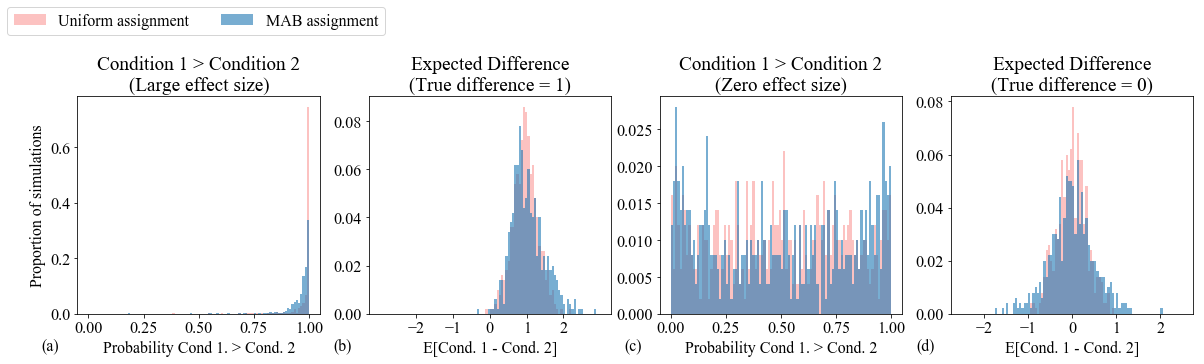

In [125]:
normalNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalNonZeroESPriorChanges24April2018ProbArmsDiffer.csv')
largeEffectUniformSampling = get_subset_of_df(normalNonZeroES, 52, 'priorBetween', 'uniform')
largeEffectBanditSampling = get_subset_of_df(normalNonZeroES, 52, '0', 'bandit')
normalZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalZeroESPriorChanges24April2018ProbArmsDiffer.csv')
noEffectUniformSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'uniform', 1.25)
noEffectBanditSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'bandit', 1.25)


print(largeEffectBanditSampling.shape)
weights = np.ones_like(noEffectUniformSampling.avg_difference)/float(noEffectUniformSampling.shape[0])

bins = np.linspace(0, 1, 101)
figure, axes = plt.subplots(1, 4, figsize = (20,4))
axes[0].hist(largeEffectUniformSampling.loc[:,'prob_bigger'], bins, alpha=0.6,color = colors[-1], label='Uniform assignment', weights=weights)
axes[0].hist(largeEffectBanditSampling.loc[:,'prob_bigger'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[0].legend(loc='upper left')
axes[0].set_ylabel('Proportion of simulations')
axes[0].set_title('Condition 1 > Condition 2\n(Large effect size)')
axes[0].set_xlabel('Probability Cond 1. > Cond. 2')
bins = np.linspace(-3, 3, 101)
axes[1].hist(largeEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[1].hist(largeEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[1].set_title('Expected Difference\n(True difference = 1)')
axes[1].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[1].set_xticks(range(-2,3,1))

bins = np.linspace(0, 1, 101)
axes[2].hist(noEffectUniformSampling.loc[:,'prob_bigger'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[2].hist(noEffectBanditSampling.loc[:,'prob_bigger'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[2].set_title('Condition 1 > Condition 2\n(Zero effect size)')
axes[2].set_xlabel('Probability Cond 1. > Cond. 2')

bins = np.linspace(-2.5, 2.5, 101)
axes[3].hist(noEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[3].hist(noEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[3].set_title('Expected Difference\n(True difference = 0)')
axes[3].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[3].set_xticks(range(-2,3,1))

legend_anchor=(1.3, 1.45)
axes[0].legend(ncol=2, bbox_to_anchor=legend_anchor)

starting_label_x = 0.1
label_y = 0
label_x_increment = 0.2025
for i in range(4):
    plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
                   '(' + chr(ord('a')+i) + ')', fontsize=16)
plt.subplots_adjust(wspace=0.2)
figure.savefig(outdir_prefix+date_prefix+'HistogramConditionDiff.pdf', bbox_inches='tight')

(500, 9)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


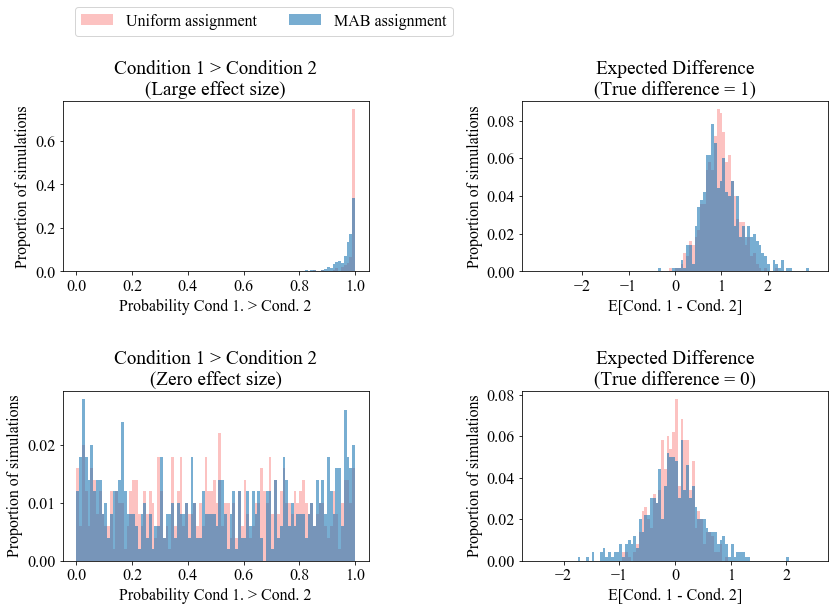

In [33]:
normalNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalNonZeroESPriorChanges24April2018ProbArmsDiffer.csv')
largeEffectUniformSampling = get_subset_of_df(normalNonZeroES, 52, 'priorBetween', 'uniform')
largeEffectBanditSampling = get_subset_of_df(normalNonZeroES, 52, '0', 'bandit')
normalZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalZeroESPriorChanges24April2018ProbArmsDiffer.csv')
noEffectUniformSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'uniform', 1.25)
noEffectBanditSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'bandit', 1.25)


print(largeEffectBanditSampling.shape)
weights = np.ones_like(noEffectUniformSampling.avg_difference)/float(noEffectUniformSampling.shape[0])

bins = np.linspace(0, 1, 101)
# figure, axes = plt.subplots(1, 4, figsize = (20,4))
figure, axes = plt.subplots(2, 2, figsize = (12,8))

axes[0,0].hist(largeEffectUniformSampling.loc[:,'prob_bigger'], bins, alpha=0.6,color = colors[-1], label='Uniform assignment', weights=weights)
axes[0,0].hist(largeEffectBanditSampling.loc[:,'prob_bigger'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[0,0].legend(loc='upper left')
axes[0,0].set_title('Condition 1 > Condition 2\n(Large effect size)')
axes[0,0].set_xlabel('Probability Cond 1. > Cond. 2')
bins = np.linspace(-3, 3, 101)
axes[0,1].hist(largeEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[0,1].hist(largeEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[0,1].set_title('Expected Difference\n(True difference = 1)')
axes[0,1].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[0,1].set_xticks(range(-2,3,1))

bins = np.linspace(0, 1, 101)
axes[1,0].hist(noEffectUniformSampling.loc[:,'prob_bigger'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[1,0].hist(noEffectBanditSampling.loc[:,'prob_bigger'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[1,0].set_title('Condition 1 > Condition 2\n(Zero effect size)')
axes[1,0].set_xlabel('Probability Cond 1. > Cond. 2')

bins = np.linspace(-2.5, 2.5, 101)
axes[1,1].hist(noEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[1,1].hist(noEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[1,1].set_title('Expected Difference\n(True difference = 0)')
axes[1,1].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[1,1].set_xticks(range(-2,3,1))

legend_anchor=(1.3, 1.6)
axes[0,0].legend(ncol=2, bbox_to_anchor=legend_anchor)

for i in range(2):
    for j in range(2):
        axes[i,j].set_ylabel('Proportion of simulations')


# starting_label_x = 0.1
# label_y = 0
# label_x_increment = 0.2025
# for i in range(4):
#     plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
#                    '(' + chr(ord('a')+i) + ')', fontsize=16)
# plt.subplots_adjust(wspace=0.2)
figure.tight_layout()
figure.subplots_adjust(wspace = .5, hspace = .7)
figure.show()

save_date_prefix = "190617"

figure.savefig(outdir_prefix+save_date_prefix+'HistogramConditionDiff.pdf', bbox_inches='tight')

(500, 9)


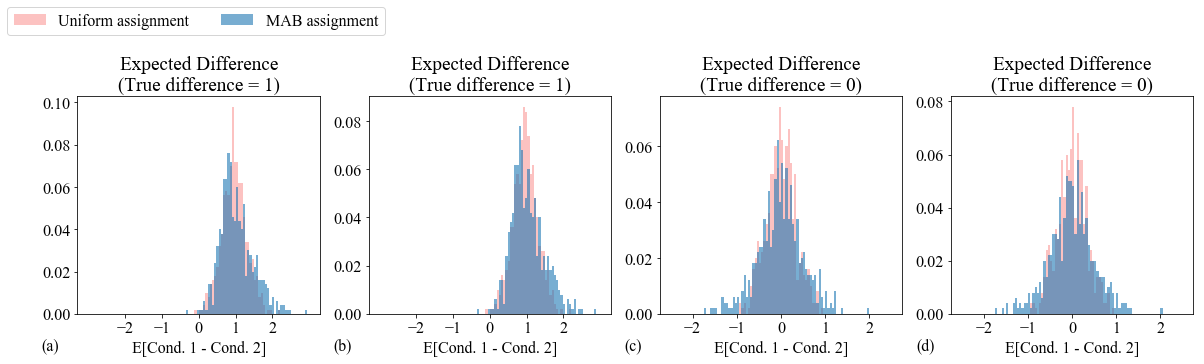

In [124]:
normalNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalNonZeroESPriorChanges24April2018ProbArmsDiffer.csv')
largeEffectUniformSampling = get_subset_of_df(normalNonZeroES, 52, 'priorBetween', 'uniform')
largeEffectBanditSampling = get_subset_of_df(normalNonZeroES, 52, '0', 'bandit')
normalZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalZeroESPriorChanges24April2018ProbArmsDiffer.csv')
noEffectUniformSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'uniform', 1.25)
noEffectBanditSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'bandit', 1.25)


print(largeEffectBanditSampling.shape)
weights = np.ones_like(noEffectUniformSampling.avg_difference)/float(noEffectUniformSampling.shape[0])

bins = np.linspace(0, 1, 101)
figure, axes = plt.subplots(1, 4, figsize = (20,4))
bins = np.linspace(-3, 3, 101)
axes[0].hist(largeEffectUniformSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[0].hist(largeEffectBanditSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[0].set_title('Expected Difference\n(True difference = 1)')
axes[0].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[0].set_xticks(range(-2,3,1))
bins = np.linspace(-3, 3, 101)
axes[1].hist(largeEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[1].hist(largeEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[1].set_title('Expected Difference\n(True difference = 1)')
axes[1].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[1].set_xticks(range(-2,3,1))


bins = np.linspace(-2.5, 2.5, 101)
axes[2].hist(noEffectUniformSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[2].hist(noEffectBanditSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[2].set_title('Expected Difference\n(True difference = 0)')
axes[2].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[2].set_xticks(range(-2,3,1))

bins = np.linspace(-2.5, 2.5, 101)
axes[3].hist(noEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[3].hist(noEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[3].set_title('Expected Difference\n(True difference = 0)')
axes[3].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[3].set_xticks(range(-2,3,1))

legend_anchor=(1.3, 1.45)
axes[0].legend(ncol=2, bbox_to_anchor=legend_anchor)

starting_label_x = 0.1
label_y = 0
label_x_increment = 0.2025
for i in range(4):
    plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
                   '(' + chr(ord('a')+i) + ')', fontsize=16)
plt.subplots_adjust(wspace=0.2)
figure.savefig(outdir_prefix+date_prefix+'HistogramConditionDiff.pdf', bbox_inches='tight')

In [20]:
normalNonZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalNonZeroESPriorChanges24April2018ProbArmsDiffer.csv')
largeEffectUniformSampling = get_subset_of_df(normalNonZeroES, 52, 'priorBetween', 'uniform')
largeEffectBanditSampling = get_subset_of_df(normalNonZeroES, 52, '0', 'bandit')
normalZeroES = pd.read_csv('/Users/rafferty/banditalgorithms/data/normalZeroESPriorChanges24April2018ProbArmsDiffer.csv')
noEffectUniformSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'uniform', 1.25)
noEffectBanditSampling = get_subset_of_df(normalZeroES, 52, 'priorBetween', 'bandit', 1.25)


print(largeEffectBanditSampling.shape)
weights = np.ones_like(noEffectUniformSampling.avg_difference)/float(noEffectUniformSampling.shape[0])

bins = np.linspace(0, 1, 101)
figure, axes = plt.subplots(1, 4, figsize = (20,4))
bins = np.linspace(-3, 3, 101)
axes[0].hist(largeEffectUniformSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[0].hist(largeEffectBanditSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[0].set_title('Expected Difference\n(True difference = 1)')
axes[0].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[0].set_xticks(range(-2,3,1))
bins = np.linspace(-3, 3, 101)
axes[1].hist(largeEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[1].hist(largeEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[1].set_title('Expected Difference\n(True difference = 1)')
axes[1].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[1].set_xticks(range(-2,3,1))


bins = np.linspace(-2.5, 2.5, 101)
axes[2].hist(noEffectUniformSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[2].hist(noEffectBanditSampling.loc[:,'avg_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[2].set_title('Expected Difference\n(True difference = 0)')
axes[2].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[2].set_xticks(range(-2,3,1))

bins = np.linspace(-2.5, 2.5, 101)
axes[3].hist(noEffectUniformSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[-1],label='Uniform assignment', weights=weights)
axes[3].hist(noEffectBanditSampling.loc[:,'exp_value_difference'], bins, alpha=0.6, color = colors[1],label='MAB assignment', weights=weights)
axes[3].set_title('Expected Difference\n(True difference = 0)')
axes[3].set_xlabel('E[Cond. 1 - Cond. 2]')
axes[3].set_xticks(range(-2,3,1))

legend_anchor=(1.3, 1.45)
axes[0].legend(ncol=2, bbox_to_anchor=legend_anchor)

starting_label_x = 0.1
label_y = 0
label_x_increment = 0.2025
for i in range(4):
    plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
                   '(' + chr(ord('a')+i) + ')', fontsize=16)
plt.subplots_adjust(wspace=0.2)
figure.savefig(outdir_prefix+date_prefix+'HistogramConditionDiff.pdf', bbox_inches='tight')

NameError: name 'get_subset_of_df' is not defined